In [1]:
import os
# We include two ../ because we want to go two levels up in the file structure
os.chdir('../../data')

In [2]:
%pwd

'/Users/chrissoria/Documents/Programming /Data-Science-Social-Justice-main/data'

In [3]:
import pandas as pd
df = pd.read_csv('disability_sub_top_sm_lemmas.csv')

In [4]:
%who

df	 os	 pd	 


In [5]:
df.sort_values(by=['score'], ascending=False)[:3]

,index,Unnamed: 0,id,created_utc,link_flair_text,author_flair_text,author,over_18,title,is_self,selftext,score,upvote_ratio,distinguished,num_comments,lemmas
9490,18284,18284,btda50,1558904951,NaN,NaN,onegalnamedsal,False,Just because my life is on hardcore mode doesn...,True,"When I meet new people, quite often the first ...",232,NaN,NaN,25,"['meet', 'new', 'people', 'thing', 'spend', 's..."
9394,18089,18089,bfq7v6,1555862031,NaN,NaN,Disabledsnarker,False,Employers are more flexible for chain smokers ...,True,It's bullshit that employers accommodate smoke...,142,NaN,NaN,14,"['bullshit', 'employers', 'accommodate', 'smok..."
11279,22079,22079,8htanx,1525746822,Rant,NaN,knockoffpainting,False,An able-bodied person corrected the term I use...,True,"I referred to myself as “disabled”, and she co...",135,NaN,NaN,65,"['referred', 'disabled', 'corrected', 'saying'..."


In [6]:
df_top = df.loc[df['score'] >= 5, :]
len(df_top)

3695

In [7]:
df.link_flair_text.value_counts() #I might want to focus in on the Rant flair

Question             4637
Rant                 1117
Concern               667
Discussion            494
Other                 362
Article / News        110
Video                  47
Survey                 33
Blog                   28
Intimacy               22
Image                  12
MOD POST                2
Announcement            2
Survey - Approved       1
Removed: Rule 4         1
VERIFIED                1
Mod Post                1
Name: link_flair_text, dtype: int64

In [8]:
df.author_flair_text.value_counts()

MS & Fibro                                                      67
Cerebral Palsy                                                  50
chronic pain, visual impairment, CPTSD, SPD                     30
You based all your holidays off of pagan holidays!              28
dystonia and autoimmune disease                                 26
                                                                ..
Spouse--LGMD                                                     1
T1 Diabetes/Pelvic pain from neuropathy                          1
Tourettes                                                        1
Former President of Student DisAbility Union at UC Riverside     1
Educate Me                                                       1
Name: author_flair_text, Length: 382, dtype: int64

In [9]:
def type_token_ratio(tokens):
    """Calculates type-token ratio on tokens."""
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

In [10]:
for text in df['lemmas'][:10]:
    tokens = text.split()
    print('Text:\n', text)
    print('TTR:', type_token_ratio(tokens), '\n')

Text:
 ['like', 'crying', 'chronic', 'pain', 'weak', 'happy"if', 'happy', 'smile', 'means', 'possibly', 'painthe', 'fucked', 'thing', 'definitely', 'pain', 'happy', 'meet', 'nasty', 'person', 'thought', 'like', 'turns', 'horrible', 'ableist', 'vomit', 'people', 'know', 'know', 'person', 'legitimately', 'pain', 'smiling', 'people', 'vouched', 'neighbors', 'friends', 'kind', 'people', 'genuinely', 'want', 'meet', 'suddenly', 'turned', 'complete', 'bigots', 'like', 'coming', 'find', 'dear', 'member', 'family', 'like', 'dangerously', 'racist', 'uncle', 'women', 'people', 'think', 'worst', 'things', 'disabled', 'debatably', 'worst', 'thing', 'faith', 'lose', 'life', 'humanity', 'like', 'okay', 'tiny', 'spinning', 'rock', 'edge', 'centerless', 'void', 'realize', 'little', 'company', 'fellows', 'care', 'mean', "that's", 'worse', 'definitely', 'worse']
TTR: 0.8255813953488372 

Text:
 ['regular', 'bills', 'live', 'relatives', 'pay', 'small', 'things', 'food', 'clothes', 'transportation', 'mont

In [11]:
!pip install nltk

In [12]:
tokens = []
for idx, row in enumerate(df['lemmas']):
    # Notice that we put all tokens in the same list
    tokens.extend(row.split(' '))

In [13]:
import nltk
nltk.download('stopwords')
from nltk.text import Text

disability_tokens = Text(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrissoria/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
help(Text)

Help on class Text in module nltk.text:

class Text(builtins.object)
 |  Text(tokens, name=None)
 |  
 |  A wrapper around a sequence of simple (string) tokens, which is
 |  intended to support initial exploration of texts (via the
 |  interactive console).  Its methods perform a variety of analyses
 |  on the text's contexts (e.g., counting, concordancing, collocation
 |  discovery), and display the results.  If you wish to write a
 |  program which makes use of these analyses, then you should bypass
 |  the ``Text`` class, and use the appropriate analysis function or
 |  class directly instead.
 |  
 |  A ``Text`` is typically initialized from a given document or
 |  corpus.  E.g.:
 |  
 |  >>> import nltk.corpus
 |  >>> from nltk.text import Text
 |  >>> moby = Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, i)
 |  
 |  __init__(self, tokens, name=None)
 |      Create a Text object.
 |      
 |      :param tokens:

In [15]:
disability_tokens.concordance("'chronic'", width=50) #why is it not finding any matches?

no matches


In [16]:
disability_tokens.collocation_list()

[("'feel',", "'like',"),
 ("'social',", "'security',"),
 ("'mental',", "'health',"),
 ("'cerebral',", "'palsy',"),
 ("'years',", "'ago',"),
 ("'panic',", "'attacks',"),
 ("'able',", "'bodied',"),
 ("'disabled',", "'people',"),
 ("'chronic',", "'pain',"),
 ("'high',", "'school',"),
 ("'years',", "'old',"),
 ("'mental',", "'illness',"),
 ("'multiple',", "'sclerosis',"),
 ("'year',", "'old',"),
 ("'$',", "'month',"),
 ("'people',", "'disabilities',"),
 ("'spinal',", "'cord',"),
 ("'long',", "'term',"),
 ("'depression',", "'anxiety',"),
 ("'anxiety',", "'depression',")]

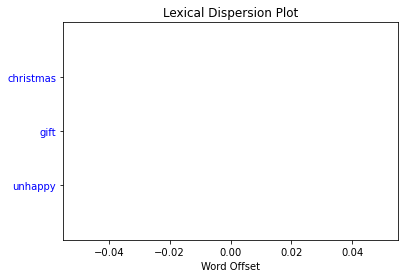

In [17]:
disability_tokens.dispersion_plot(["christmas", "gift", "unhappy"])